#Importing libaries and data sets

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


#Feature Selection
Below are the columns I decided to use and why I believe they affect the pricing. 
I will analyze each of the column to see if there is any correlation between them and sale prices
Once Completed I will evaluate the ones that did result with positive regression and from there create a multilinear regression model to see how they affect each other versus when evaluated on their own
- SalePrice: This is the dependent variable we are trying to product
- Neighborhood: the location can impact price
- MSZoning: The classification of the sale can impact price. Ex: high vs low residential density
- GrLivArea: A larger lot can lead to an increase in price
- BldgType: Different types of buildings can lead to differences in prices. A single family might cost more than a duple
- HouseStyle: The different stories can affect prices as a 2 story can take have the same sq ft as a single story without taking up as much surface area
- OVerallQual: Quality of material and finish can affect price due to upfront cost
- OVerallCond: Condition of the house can affect price due to how valuable the condition is perceived
- YearBuilt: Age of house can affect price as the age can enhanced the value
- BedroomAbvGr: Amount of bedrooms can affect pricing as more bedrooms can lead to higher prices
-FullBath: Similar to Bedroom
-HalfBath: Similar to bedroom



In [21]:
train = train[['Neighborhood', 'MSZoning','GrLivArea','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','BedroomAbvGr','FullBath','HalfBath','SalePrice']]
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   MSZoning      1460 non-null   object
 2   GrLivArea     1460 non-null   int64 
 3   BldgType      1460 non-null   object
 4   HouseStyle    1460 non-null   object
 5   OverallQual   1460 non-null   int64 
 6   OverallCond   1460 non-null   int64 
 7   YearBuilt     1460 non-null   int64 
 8   BedroomAbvGr  1460 non-null   int64 
 9   FullBath      1460 non-null   int64 
 10  HalfBath      1460 non-null   int64 
 11  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.0+ KB
None


#Determining Missing Values

In [22]:
train.isnull().sum()

Neighborhood    0
MSZoning        0
GrLivArea       0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

##Features and dependent variable did not contain any null variables. Individual analysis of each feature can begin

#Analyzing Price

In [23]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

c:\Users\victo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

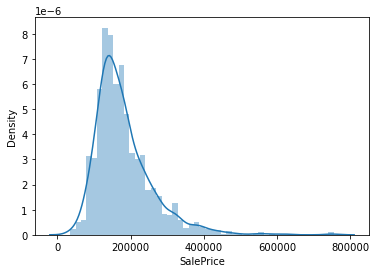

In [24]:
sns.distplot(train['SalePrice'])

Majority of sales prices seem to be around the $150,000 range

TypeError: 'Text' object is not callable

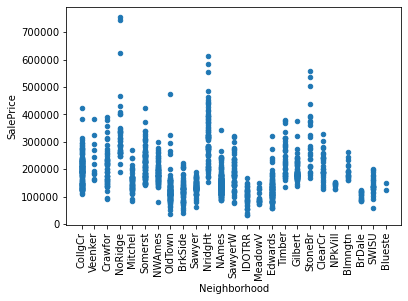

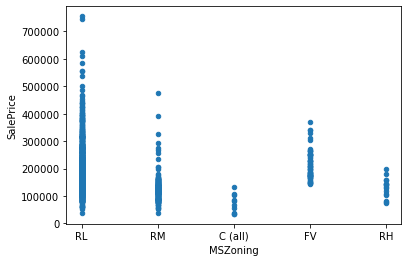

In [38]:
fig = train.plot.scatter(x='Neighborhood',y='SalePrice').tick_params(axis='x',labelrotation=90)
train.plot.scatter(x='MSZoning',y='SalePrice')
train.plot.scatter(x='GrLivArea',y='SalePrice')
train.plot.scatter(x='BldgType',y='SalePrice')
train.plot.scatter(x='HouseStyle',y='SalePrice')
train.plot.scatter(x='OverallQual',y='SalePrice')
train.plot.scatter(x='OverallCond',y='SalePrice')
train.plot.scatter(x='YearBuilt',y='SalePrice')
train.plot.scatter(x='BedroomAbvGr',y='SalePrice')
train.plot.scatter(x='FullBath',y='SalePrice')
train.plot.scatter(x='HalfBath',y='SalePrice')

